1) Загрузите встроенные данные sklearn.datasets.load_iris, взяв только последние два столбца (длина и ширина лепестков). Изобразите их на диаграмме рассеяния, подкрасив каждый класс некоторым цветом.


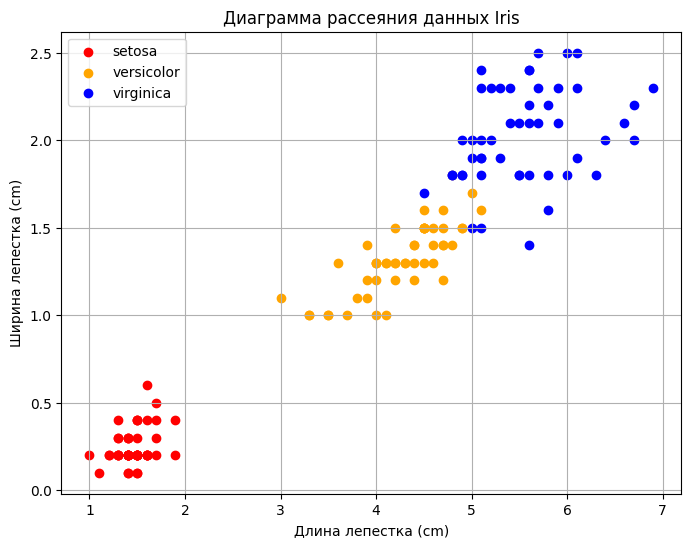

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import numpy as np

iris = load_iris()
data = iris.data[:, 2:]  #длина и ширина лепестков
target = iris.target

plt.figure(figsize=(8, 6))

colors = ['red', 'orange', 'blue']
for i in range(len(colors)):
    x = data[target == i][:, 0]  # Длина лепестка
    y = data[target == i][:, 1]  # Ширина лепестка
    plt.scatter(x, y, c=colors[i], label=iris.target_names[i])

plt.xlabel('Длина лепестка (cm)')
plt.ylabel('Ширина лепестка (cm)')
plt.title('Диаграмма рассеяния данных Iris')
plt.legend()
plt.grid(True)
plt.show()

2) Обучите модель классификационного дерева принятия решений sklearn.tree.DecisionTreeClassifier глубины 4, используя энтропию. Визуализируйте соответствующий граф дерева принятия решений.


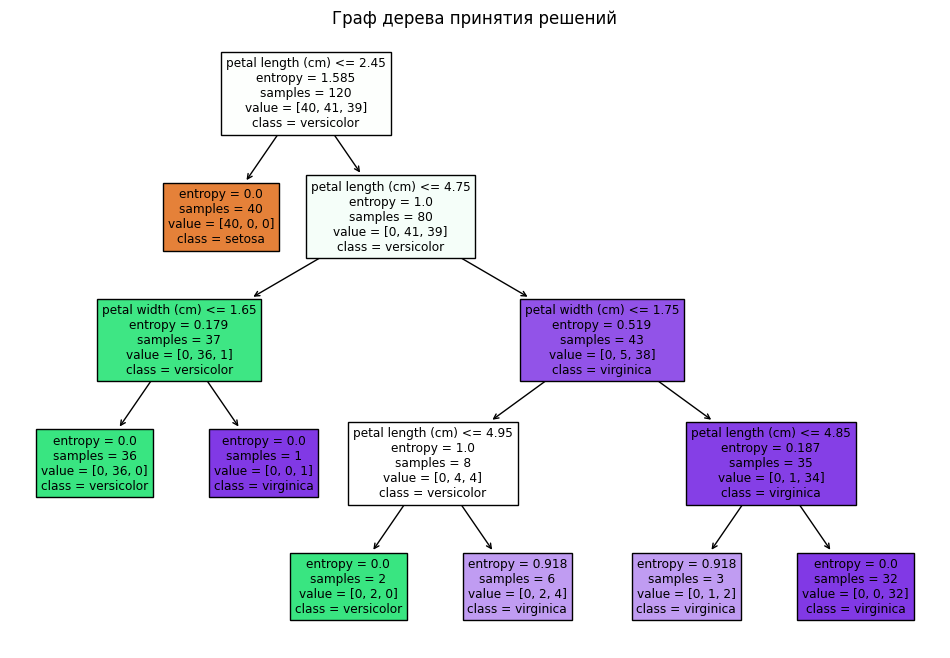

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(max_depth=4, criterion='entropy')
clf.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Граф дерева принятия решений")
plt.show()

3) Обучите модель классификационного дерева принятия решений sklearn.tree.DecisionTreeClassifier с разными глубинами (1, 2, 3, 4, 10), используя энтропию, и визуализируйте в каждом случае полученные разделяющие области.


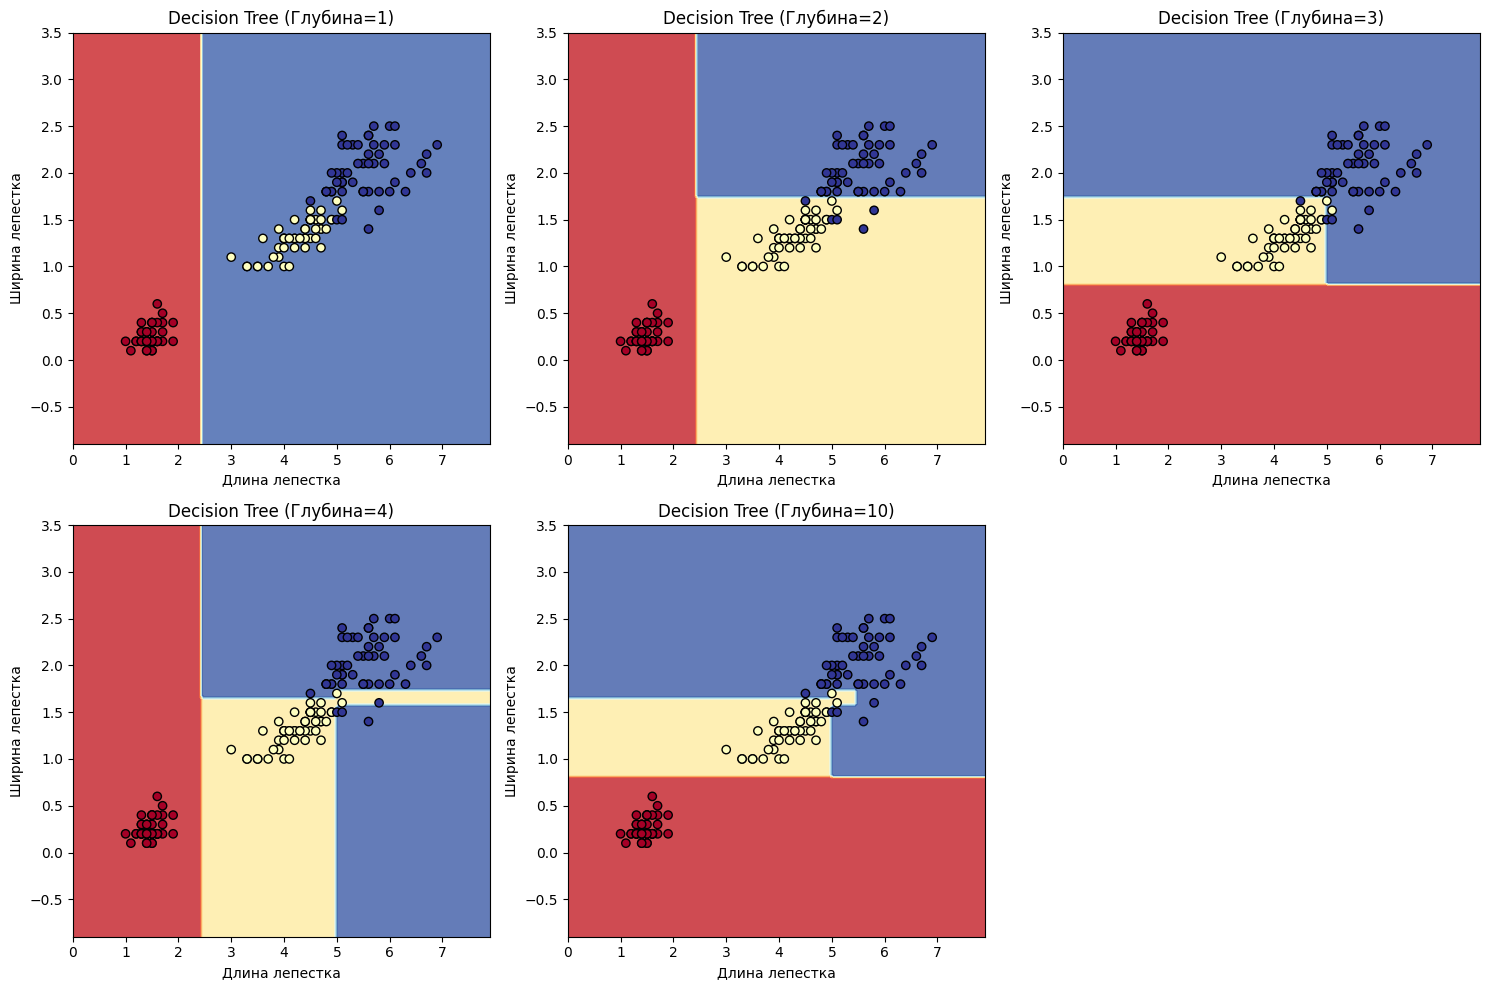

In [ ]:
iris = load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

depths = [1, 2, 3, 4, 10]

plt.figure(figsize=(15, 10))

for i, depth in enumerate(depths, start=1):
    clf = DecisionTreeClassifier(max_depth=depth, criterion='entropy')
    clf.fit(X, y)

    xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                         np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.subplot(2, 3, i)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='k')
    plt.xlabel('Длина лепестка')
    plt.ylabel('Ширина лепестка')
    plt.title(f'Decision Tree (Глубина={depth})')

plt.tight_layout()
plt.show()

4) Выведите необходимые метрики для оценки работы моделей с разными глубинами. Сделайте вывод о том, какая модель лучше классифицирует данные.


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

depths = [1, 2, 3, 4, 10]#глубина деревьев

for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, criterion='entropy')
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

for i, depth in enumerate(depths):
    print(f"Модель с глубиной {depth}:")
    print(f"  Точность: {accuracy_scores[i]:.4f}")
    print(f"  Точность классификации: {precision_scores[i]:.4f}")
    print(f"  Полнота: {recall_scores[i]:.4f}")
    print(f"  F1-мера: {f1_scores[i]:.4f}")

Модель с глубиной 1:
  Точность: 0.6333
  Точность классификации: 0.4683
  Полнота: 0.6333
  F1-мера: 0.5195
Модель с глубиной 2:
  Точность: 0.9667
  Точность классификации: 0.9694
  Полнота: 0.9667
  F1-мера: 0.9664
Модель с глубиной 3:
  Точность: 1.0000
  Точность классификации: 1.0000
  Полнота: 1.0000
  F1-мера: 1.0000
Модель с глубиной 4:
  Точность: 1.0000
  Точность классификации: 1.0000
  Полнота: 1.0000
  F1-мера: 1.0000
Модель с глубиной 10:
  Точность: 1.0000
  Точность классификации: 1.0000
  Полнота: 1.0000
  F1-мера: 1.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


5) Загрузите весь датасет load_iris. Обучите модель классификационного дерева принятия решений sklearn.tree.DecisionTreeClassifier глубины 4, используя энтропию. Визуализируйте соответствующий граф дерева решений. Оцените качество работы модели.


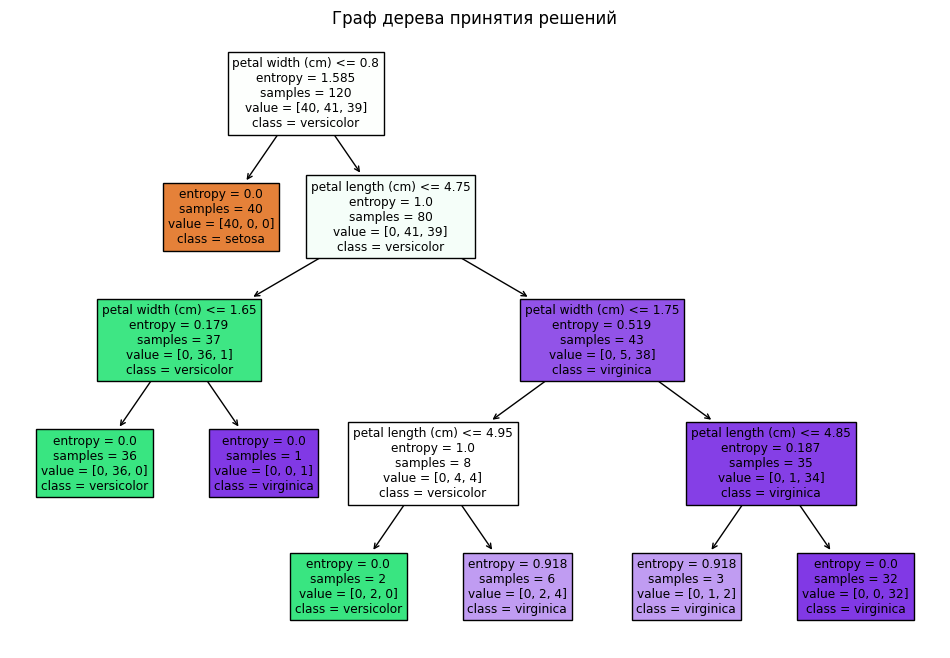

Точность модели: 1.0

Отчет о классификации:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(max_depth=4, criterion='entropy')
clf.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Граф дерева принятия решений")
plt.show()

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Точность модели:", accuracy)
print("\nОтчет о классификации:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

6) Загрузите встроенные данные sklearn.datasets.california_housing, взяв только столбец AveBedrms в качестве единственного признака. Изобразите данные на диаграмме рассеяния так, чтобы на одной оси были отмечены значения признака, а на другой - целевой переменной.

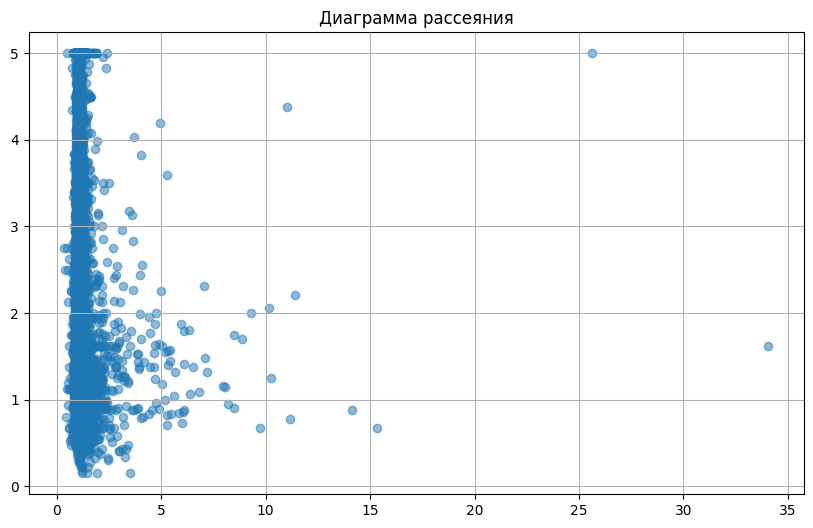

In [ ]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing()
X = california_housing.data[:,3:4]
y = california_housing.target

plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5)
plt.title('Диаграмма рассеяния')
plt.grid(True)
plt.show()

7) Обучите модель регрессионного дерева принятия решений sklearn.tree.DecisionTreeRegressor, зафиксировав random_state=0, а остальными гиперпараметрами по умолчению.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(max_depth=3,random_state=0)
regressor.fit(X,y)

DecisionTreeRegressor(max_depth=3, random_state=0)

8) Визуализируйте соответствующий граф дерева решений и получившуюся кусочную линию регрессии.

Text(0, 0.5, 'Целевая переменная')

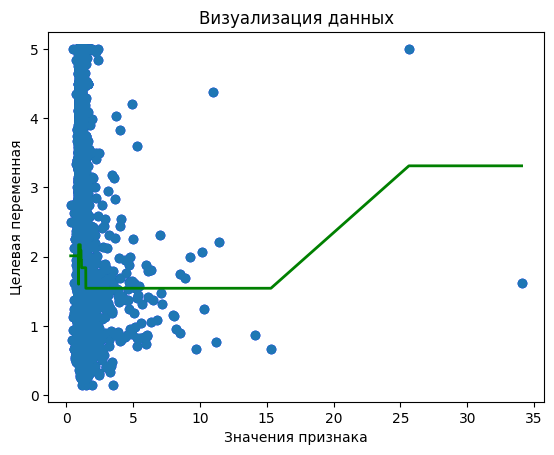

In [ ]:
sorted_features = np.argsort(X, axis=0).flatten()
X_sorted = X[sorted_features]
y_sorted = y[sorted_features]

plt.scatter(X_sorted, y_sorted, c="b")
plt.plot(X_sorted, regressor.predict(X_sorted), "g", lw=2)

plt.scatter(X_sorted, y_sorted)
plt.title('Визуализация данных')
plt.xlabel('Значения признака')
plt.ylabel('Целевая переменная')


9) Оцените качество работы модели. Создайте новое наблюдение и сделайте предсказание на нём.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y, regressor.predict(X))
r2 = r2_score(y, regressor.predict(X))

print("Среднеквадратичная ошибка (MSE):", mse)
print("Коэффициент детерминации (R-squared):", r2)

Среднеквадратичная ошибка (MSE): 1.31052268410703
Коэффициент детерминации (R-squared): 0.015791829999576845


10) Загрузите весь датасет fetch_california_housing. Обучите ту же модель. Визуализируйте соответствующий граф дерева решений и оцените качество работы модели.


r2=  0.015791829999576845
MSE=  1.31052268410703


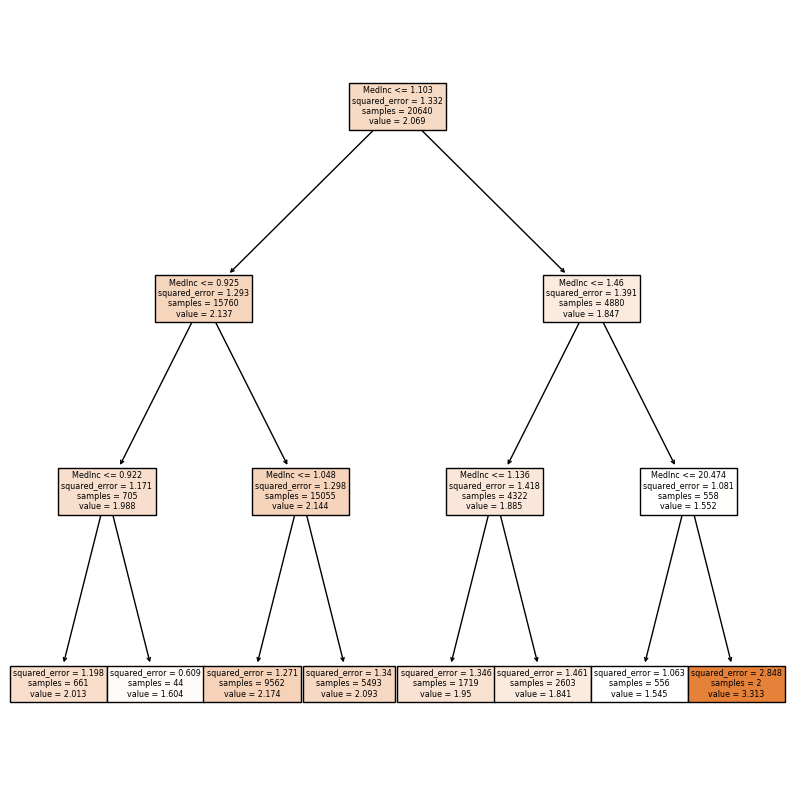

In [ ]:
from sklearn import tree
california_housing = fetch_california_housing()
X = california_housing.data[:,3:4]
y = california_housing.target

regressor = DecisionTreeRegressor(max_depth=3,random_state=0)
regressor.fit(X,y)

fig = plt.figure(figsize=(10,10))
_ = tree.plot_tree(regressor,
                   feature_names=california_housing.feature_names,
                   class_names=california_housing.target_names,
                   filled=True)

print('r2= ', r2_score(y, regressor.predict(X)))
print('MSE= ', mean_squared_error(y, regressor.predict(X)))